In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

plt.style.use(["fivethirtyeight"])

## Article analysis

In [2]:
articles_data_df = pd.read_csv("data/articles.csv", encoding="utf-8")

In [3]:
articles_data_df.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
print(f"Article df shape : {articles_data_df.shape}")

Article df shape : (105542, 25)


In [5]:
articles_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
missing_values = articles_data_df.isnull().sum()
columns_missing_values = missing_values[missing_values != 0]
print(f"There is %d columns with missing values" % len(columns_missing_values))
print("Columns with missing values: ", columns_missing_values.index.to_list())

There is 1 columns with missing values
Columns with missing values:  ['detail_desc']


In [7]:
percentage_missing_values = articles_data_df.isnull().sum() / len(articles_data_df) * 100
percentage_missing_values = percentage_missing_values[percentage_missing_values != 0]
print("Percentage missing values per feature: ", percentage_missing_values)

Percentage missing values per feature:  detail_desc    0.394156
dtype: float64


In [215]:
unique_value_counts = articles_data_df.nunique()
unique_value_counts

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

### Univariate analysis

The goal of univariate analysis is to understand the distribution and characteristics of each variable independently.

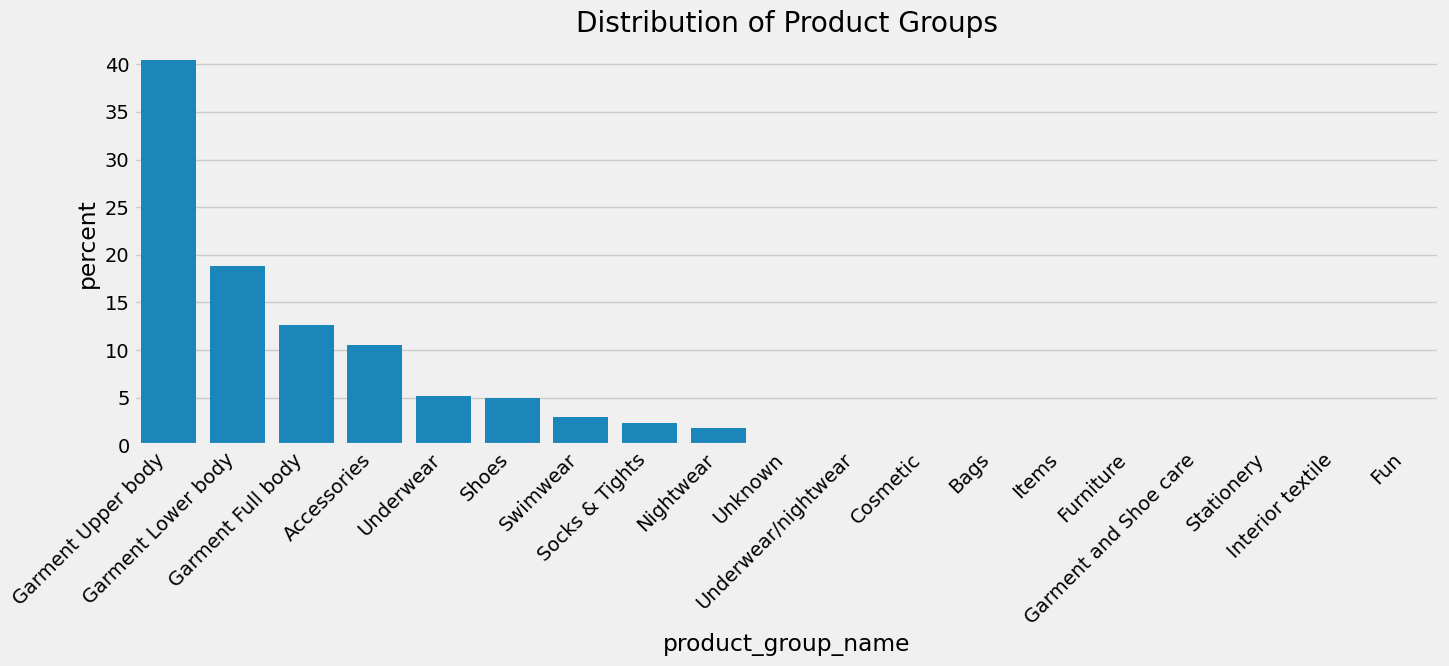

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.countplot(x="product_group_name", data=articles_data_df, order=articles_data_df["product_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Product Groups")
plt.show()

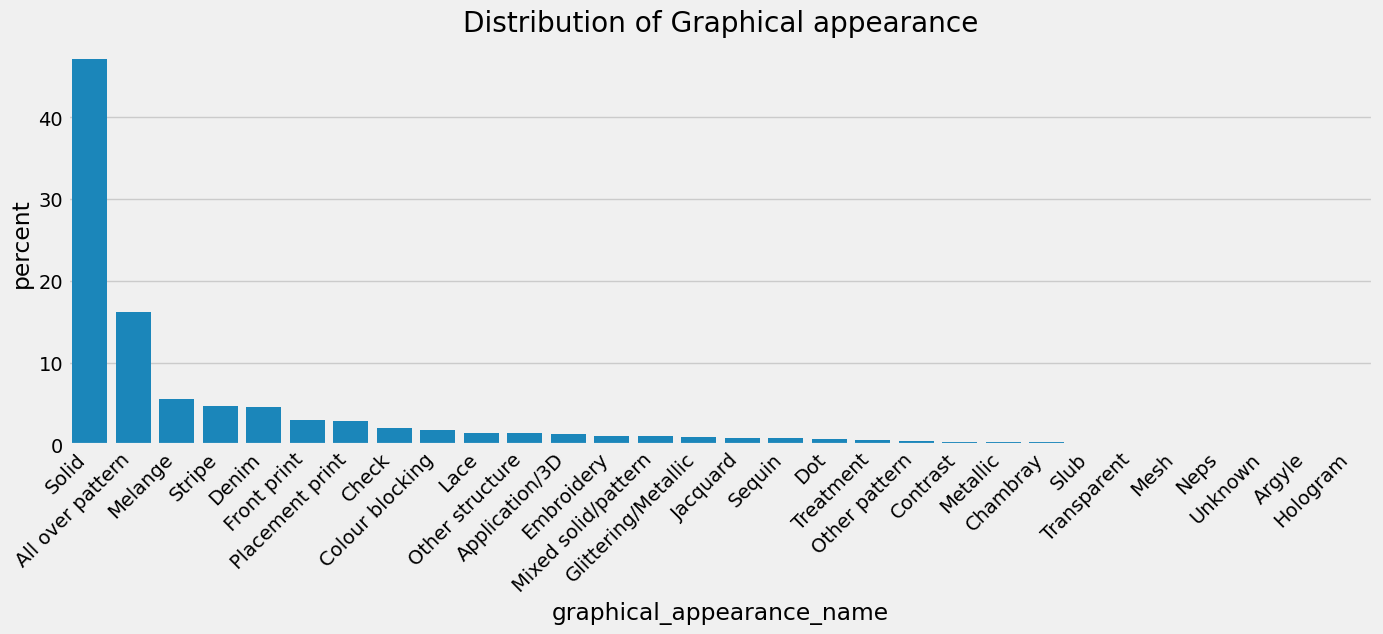

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x="graphical_appearance_name", data=articles_data_df, order=articles_data_df["graphical_appearance_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Graphical appearance")
plt.show()

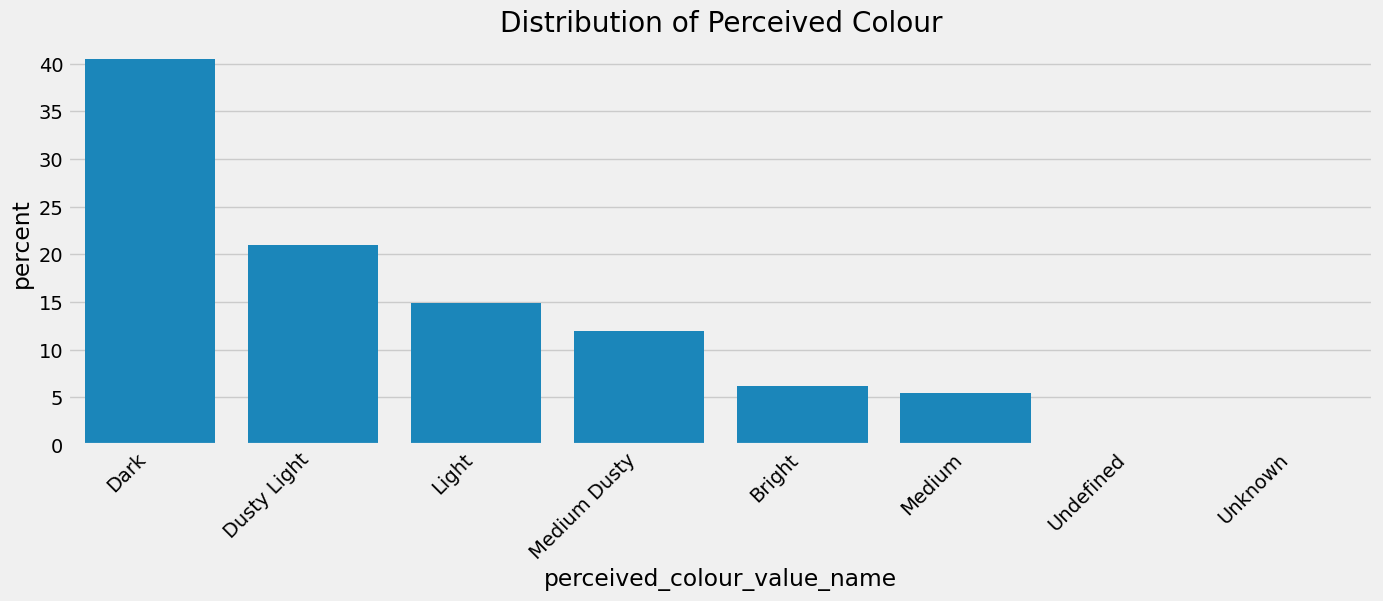

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x="perceived_colour_value_name", data=articles_data_df, order=articles_data_df["perceived_colour_value_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Perceived Colour")
plt.show()

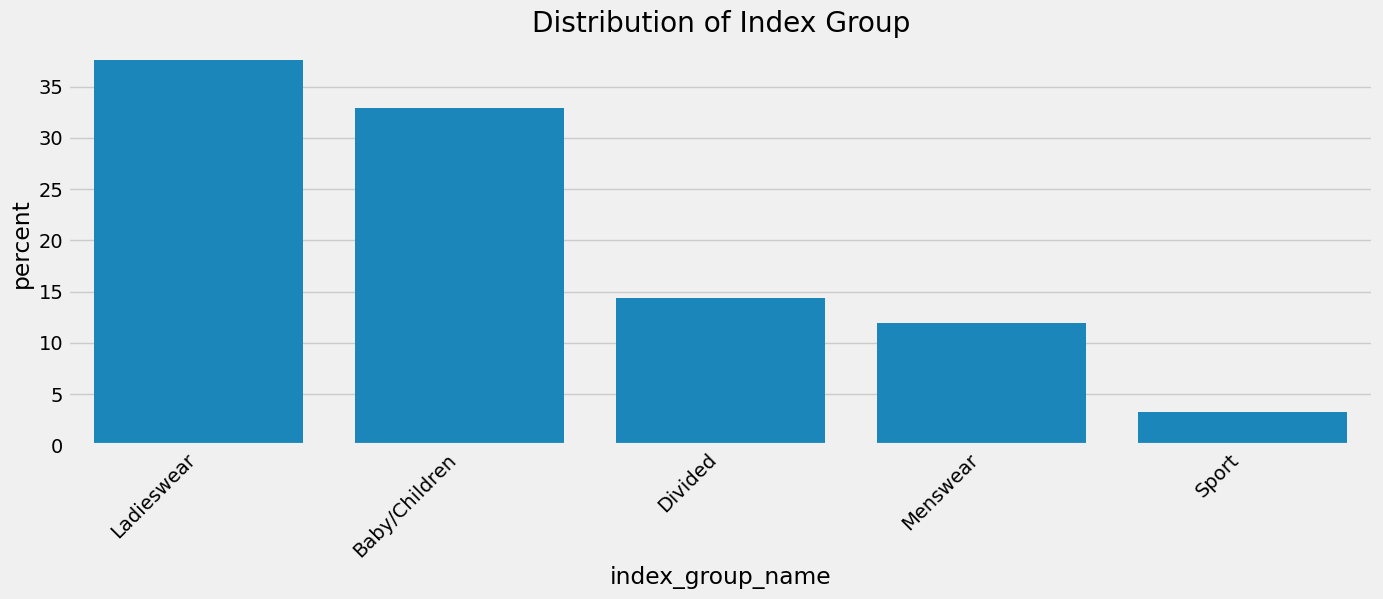

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x="index_group_name", data=articles_data_df, order=articles_data_df["index_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Index Group")
plt.show()

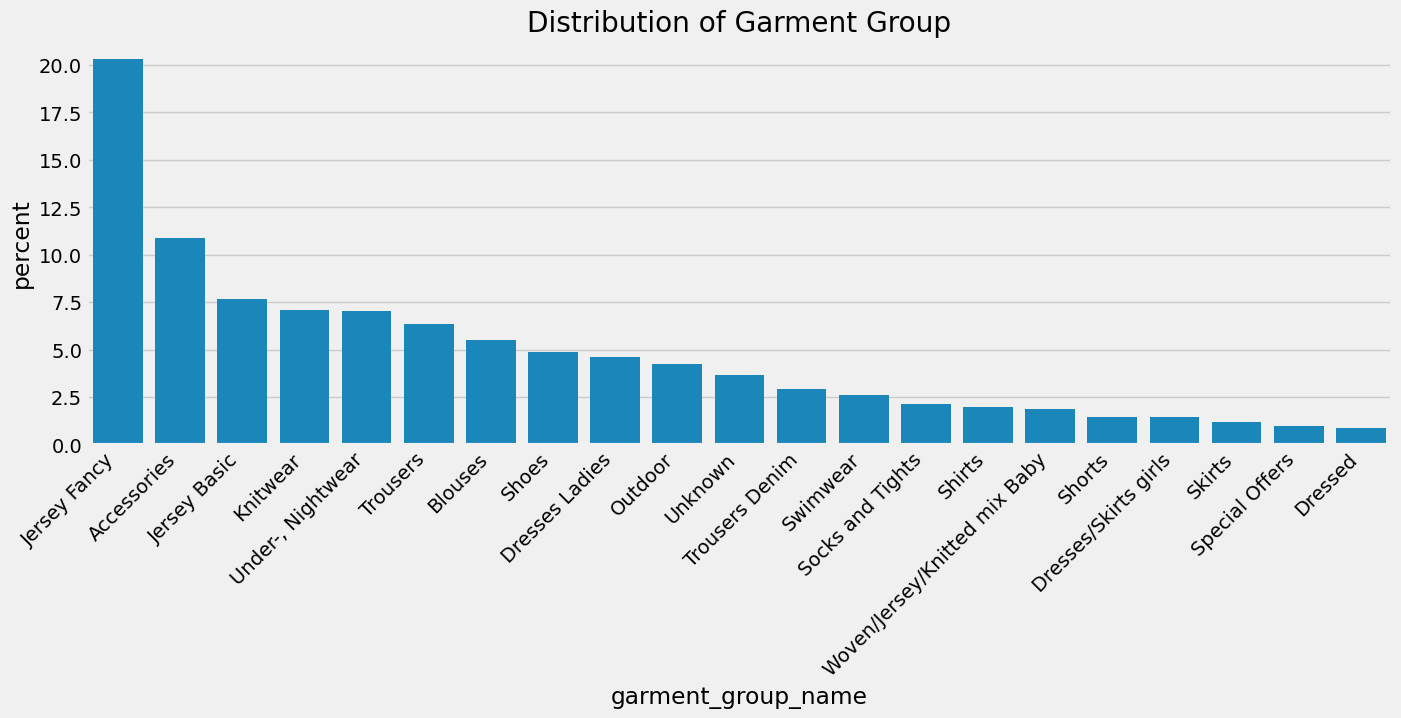

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x="garment_group_name", data=articles_data_df, order=articles_data_df["garment_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Garment Group")
plt.show()

-  The "Jersey Fancy" category has the highest percentage, approaching 20%. This suggests that it is the most common garment group in the dataset and might represent a popular or high-stocked item.
- "Accessories" comes second, it only reaches a bit over 10%.
- Categories such as "Dressed," "Special Offers," "Skirts," and "Dresses/Skirts Girls" have a very low presence (below 2.5%). This could indicate that these items are either:
	- less popular
	- seasonal
	- not heavily stocked.
- The distribution is highly uneven, with a few groups dominating.
- low-percentage categories might be specialty items or have a niche audience.
- Unknown Category are directly categories which could indicate missing or uncategorized data.

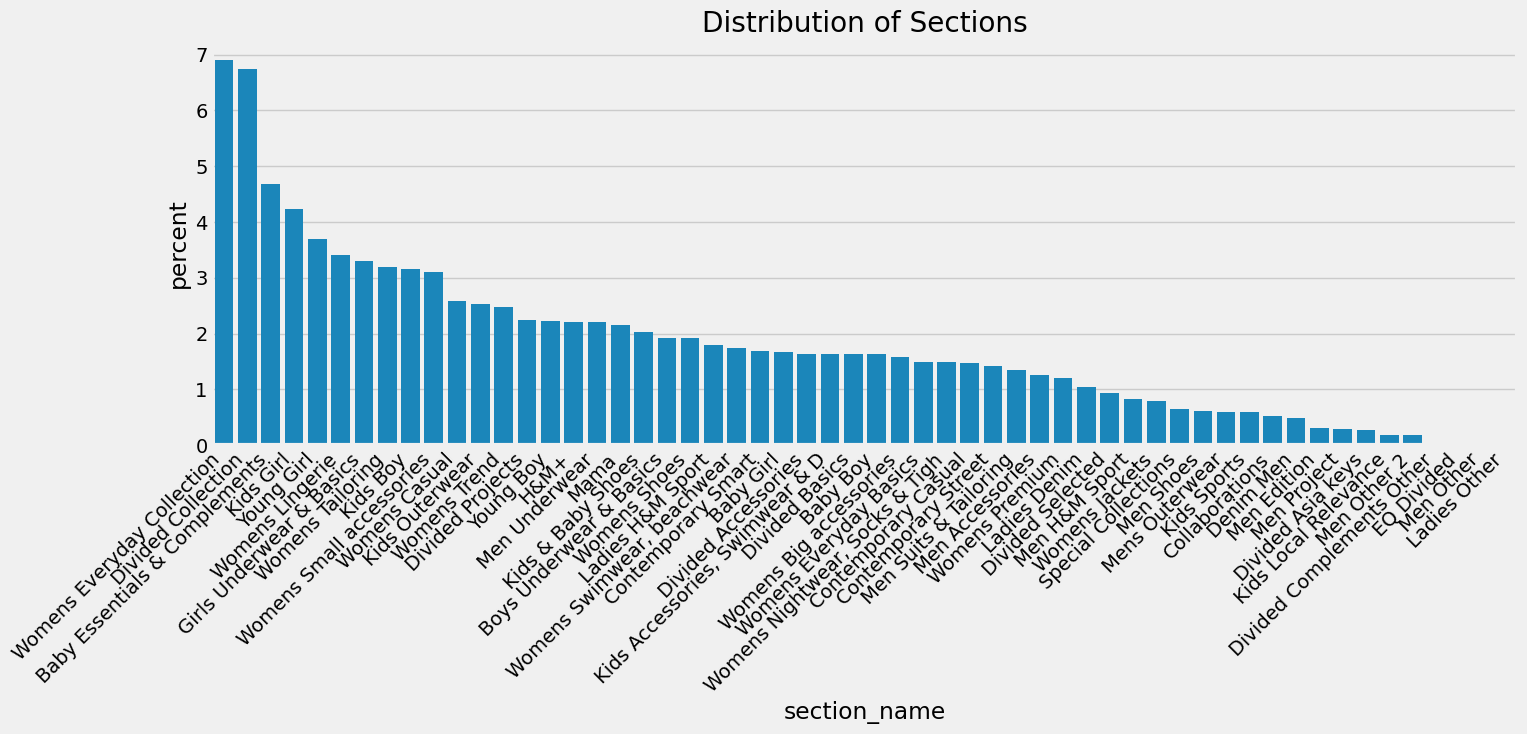

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x="section_name", data=articles_data_df, order=articles_data_df["section_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Sections")
plt.show()

-  The plot shows a wide variety of sections, indicating a diverse product offering. However, there’s a steep drop from the top sections to the lower ones, which suggests that some sections dominate the inventory more than others.
- "Womens Everyday Collection" section has the highest percentage, close to 7%. This suggests that products within this section are the most common or heavily stocked, possibly indicating a focus on women’s daily wear as a priority area.

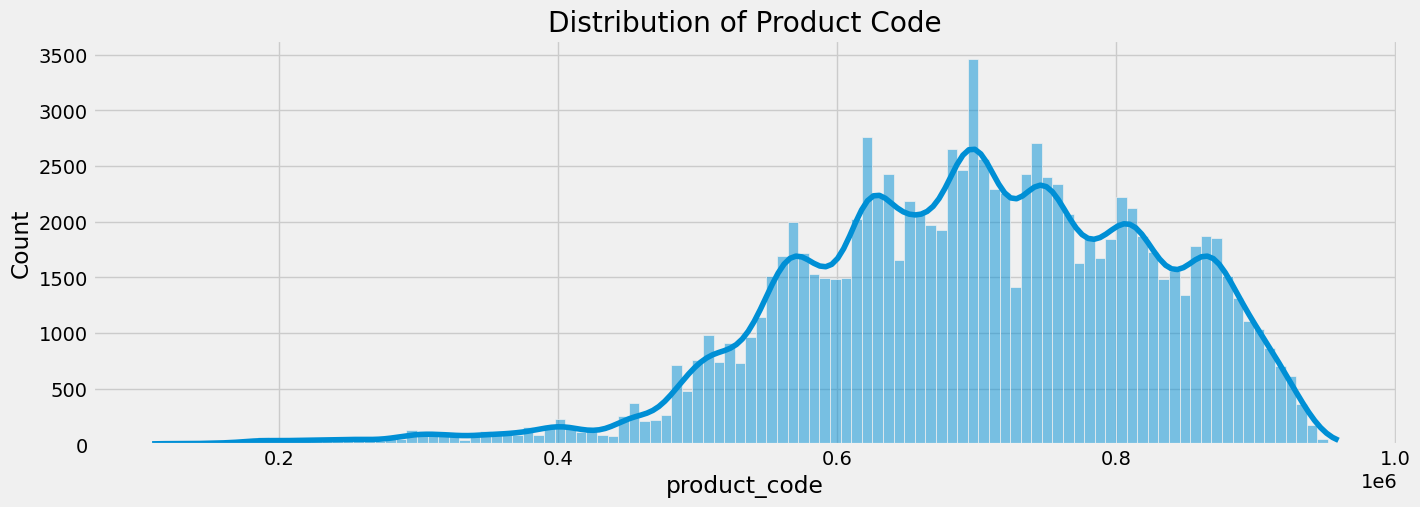

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(articles_data_df["product_code"], kde=True)
plt.title("Distribution of Product Code")
plt.show()

- One big peak peak between 0.5 and 0.7 million, indicating that a large number of products fall within this range of product codes. This could imply that H&M introduced a significant number of products or item variations in this range (possibly corresponding to a specific time or product line).
- There are several smaller peaks on both sides of the main concentration. These could represent different product categories, batches, or release cycles within the dataset.
- The left part has a lower density. This may suggest that less common products have lower product codes.
- If the product codes are assigned sequentially or in blocks, the distribution could reflect time-based patterns (such as product lines launched at different periods). The density around certain ranges might also indicate higher popularity or frequent restocking of products within those code ranges.

## Multivariate analysis

In [27]:
import winsound
import time


def make_beep(repetition=3, time_interval_seconds=4):
    for i in range(repetition):
        winsound.MessageBeep()
        # winsound.Beep(2794, 180)
        time.sleep(time_interval_seconds)


make_beep()

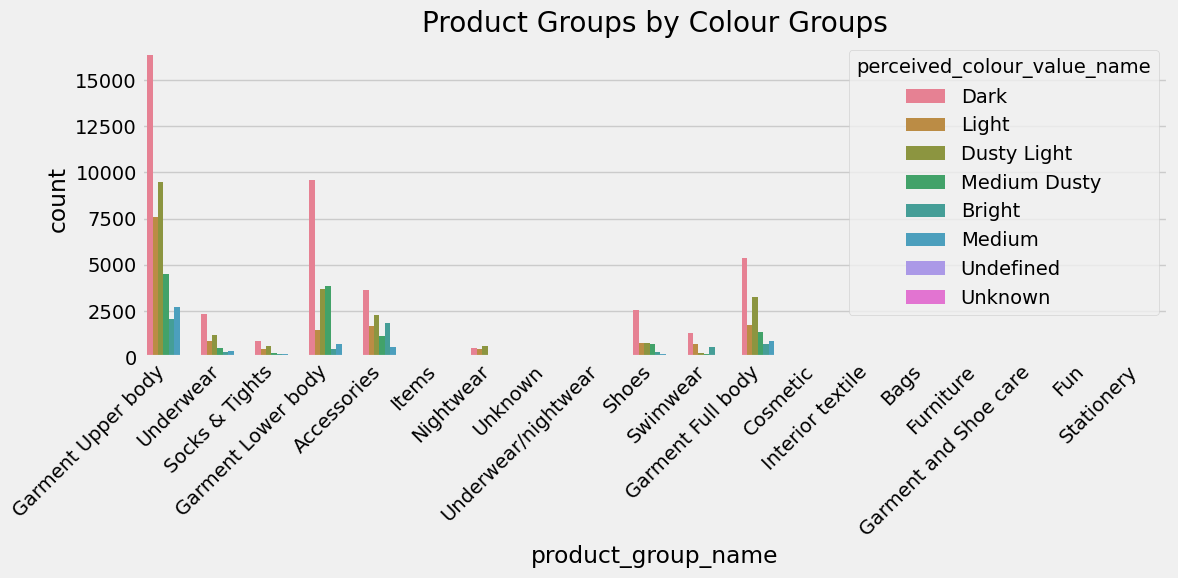

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x="product_group_name", hue="perceived_colour_value_name", data=articles_data_df)
plt.xticks(rotation=45, ha="right")
plt.title("Product Groups by Perceived Colour")
plt.tight_layout()
plt.show()

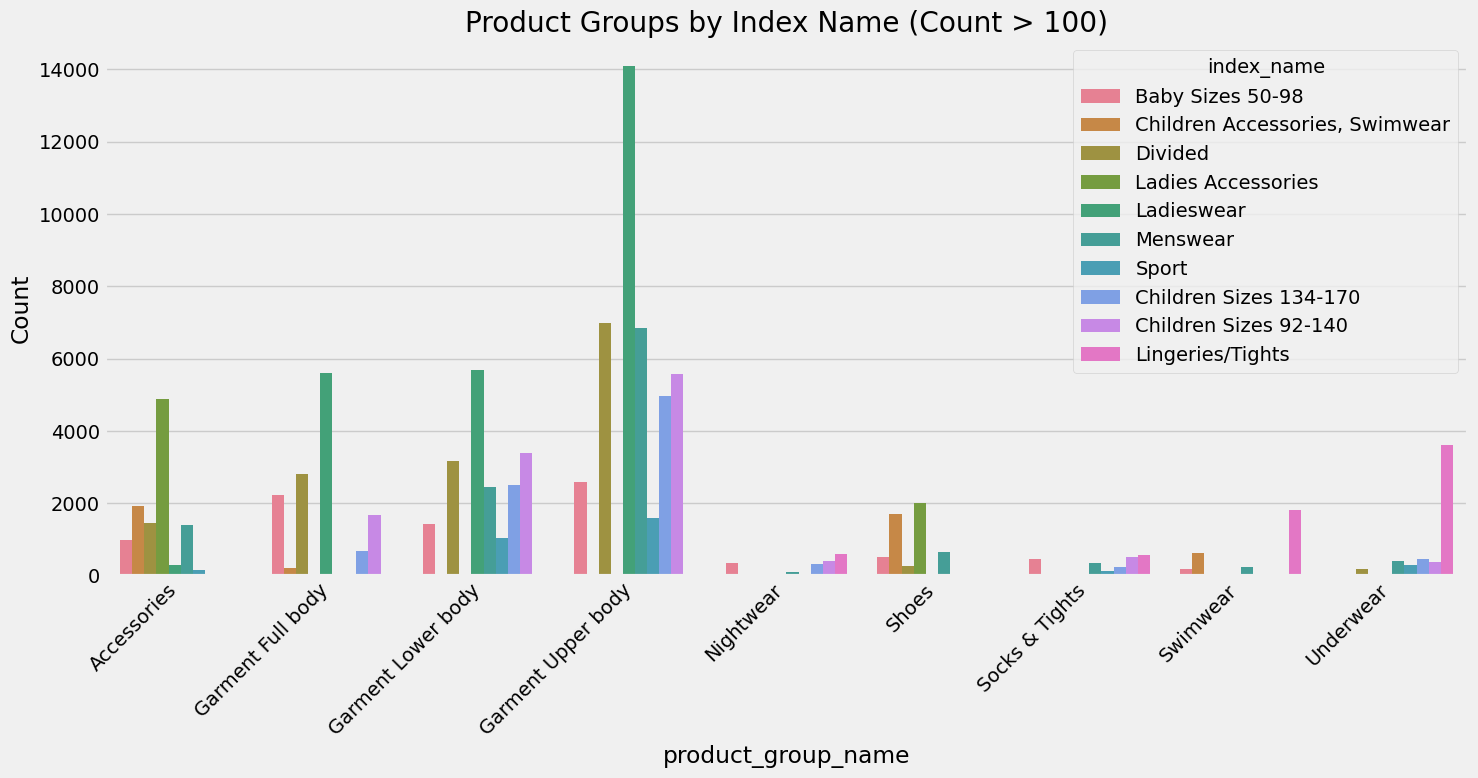

In [ ]:
count_data = articles_data_df.groupby(["product_group_name", "index_name"]).size().reset_index(name="count")
filtered_data = count_data[count_data["count"] > 100]


plt.figure(figsize=(15, 8))
sns.barplot(x="product_group_name", y="count", hue="index_name", data=filtered_data)
plt.xticks(rotation=45, ha="right")
plt.title("Product Groups by Index Name (Count > 100)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

- "Garment Upper body" has high volume in "Dark" and "Medium Dusty" colors.
- 

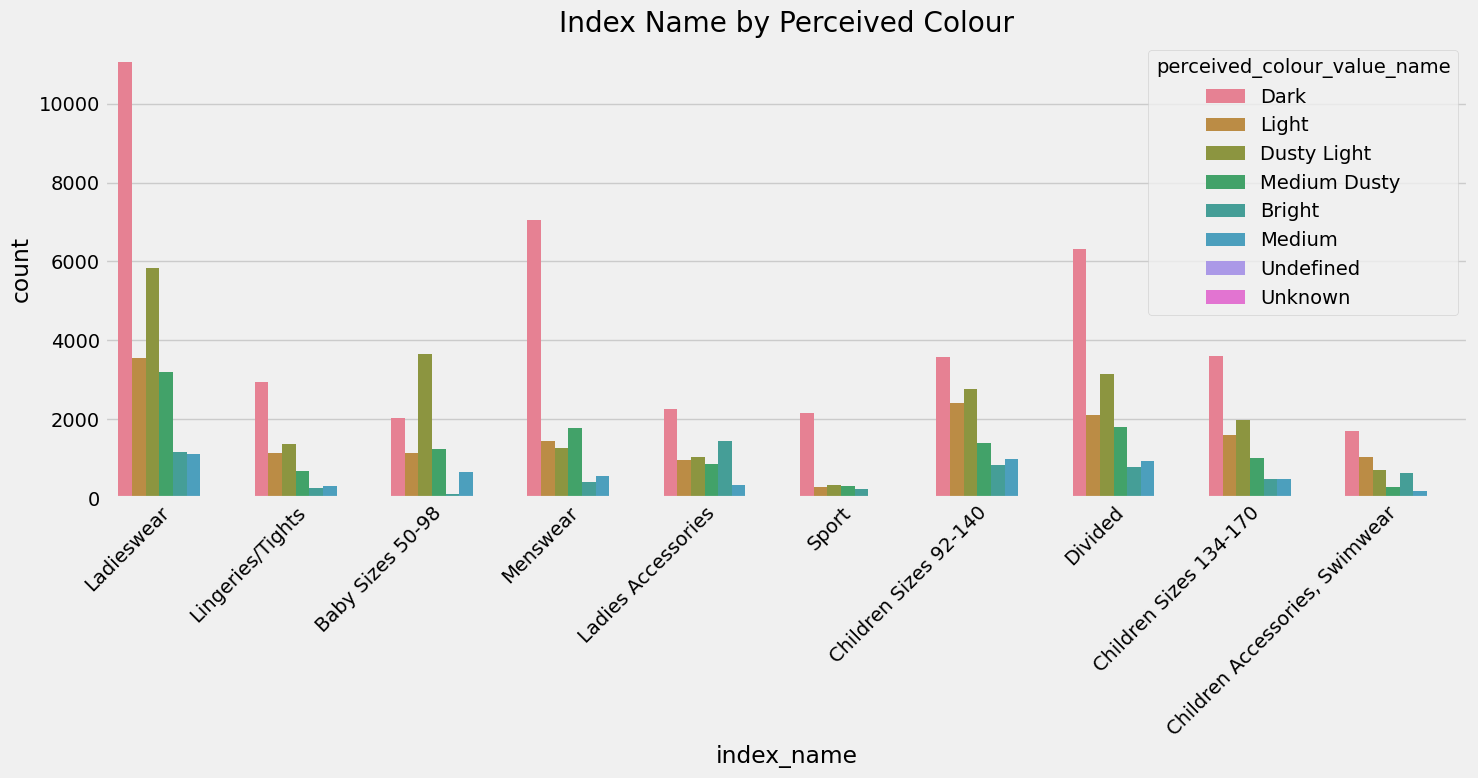

In [245]:
plt.figure(figsize=(15, 8))
sns.countplot(x="index_name", hue="perceived_colour_value_name", data=articles_data_df)
plt.xticks(rotation=45, ha="right")
plt.title("Index Name by Perceived Colour")
plt.tight_layout()
plt.show()

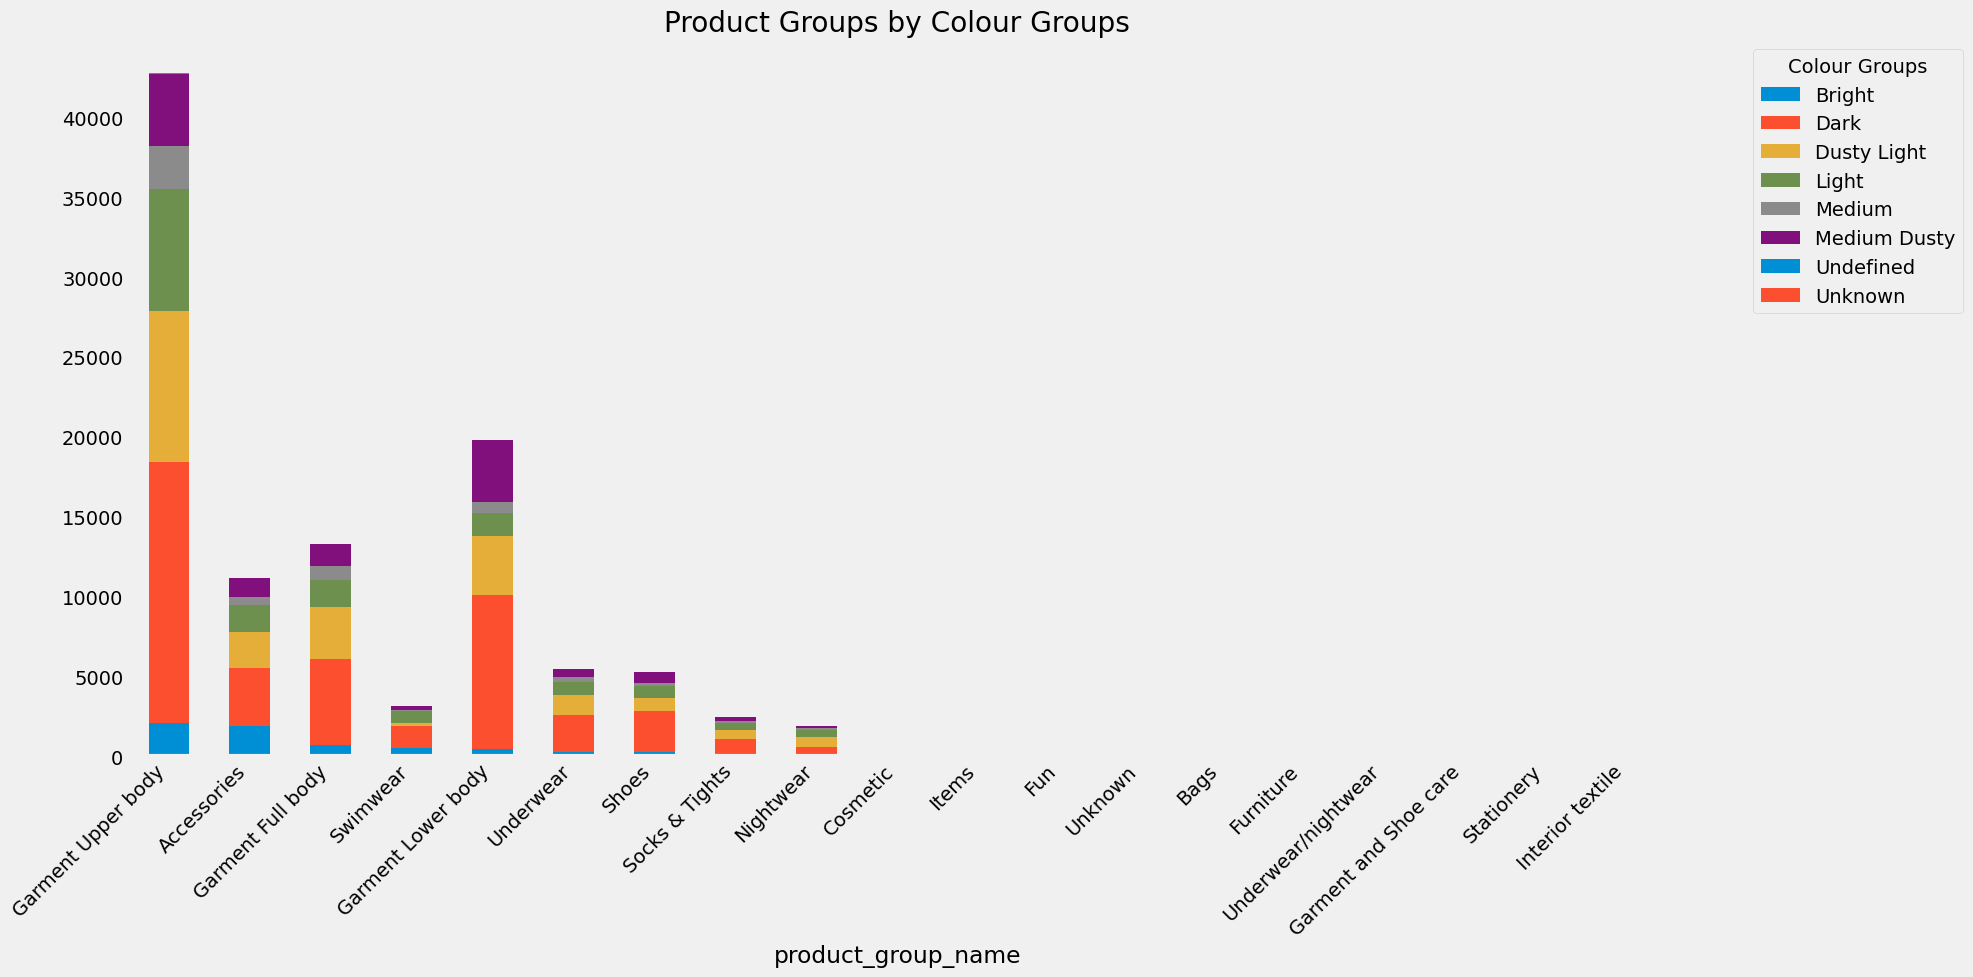

In [271]:
# Group and aggregate the data
grouped_data = articles_data_df.groupby(["product_group_name", "perceived_colour_value_name"]).size().unstack()

# Sort the data
# Sort by total count of each product group (descending order)
sorted_data = grouped_data.sort_values(by=grouped_data.columns.to_list(), ascending=False, axis=0)

# Plot the sorted data
ax = sorted_data.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 10),
    use_index=True,
    grid=False,
)

plt.title("Product Groups by Colour Groups")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Colour Groups", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [67]:
articles_data_df["index_code"].unique()

array(['A', 'B', 'G', 'F', 'C', 'S', 'H', 'D', 'I', 'J'], dtype=object)

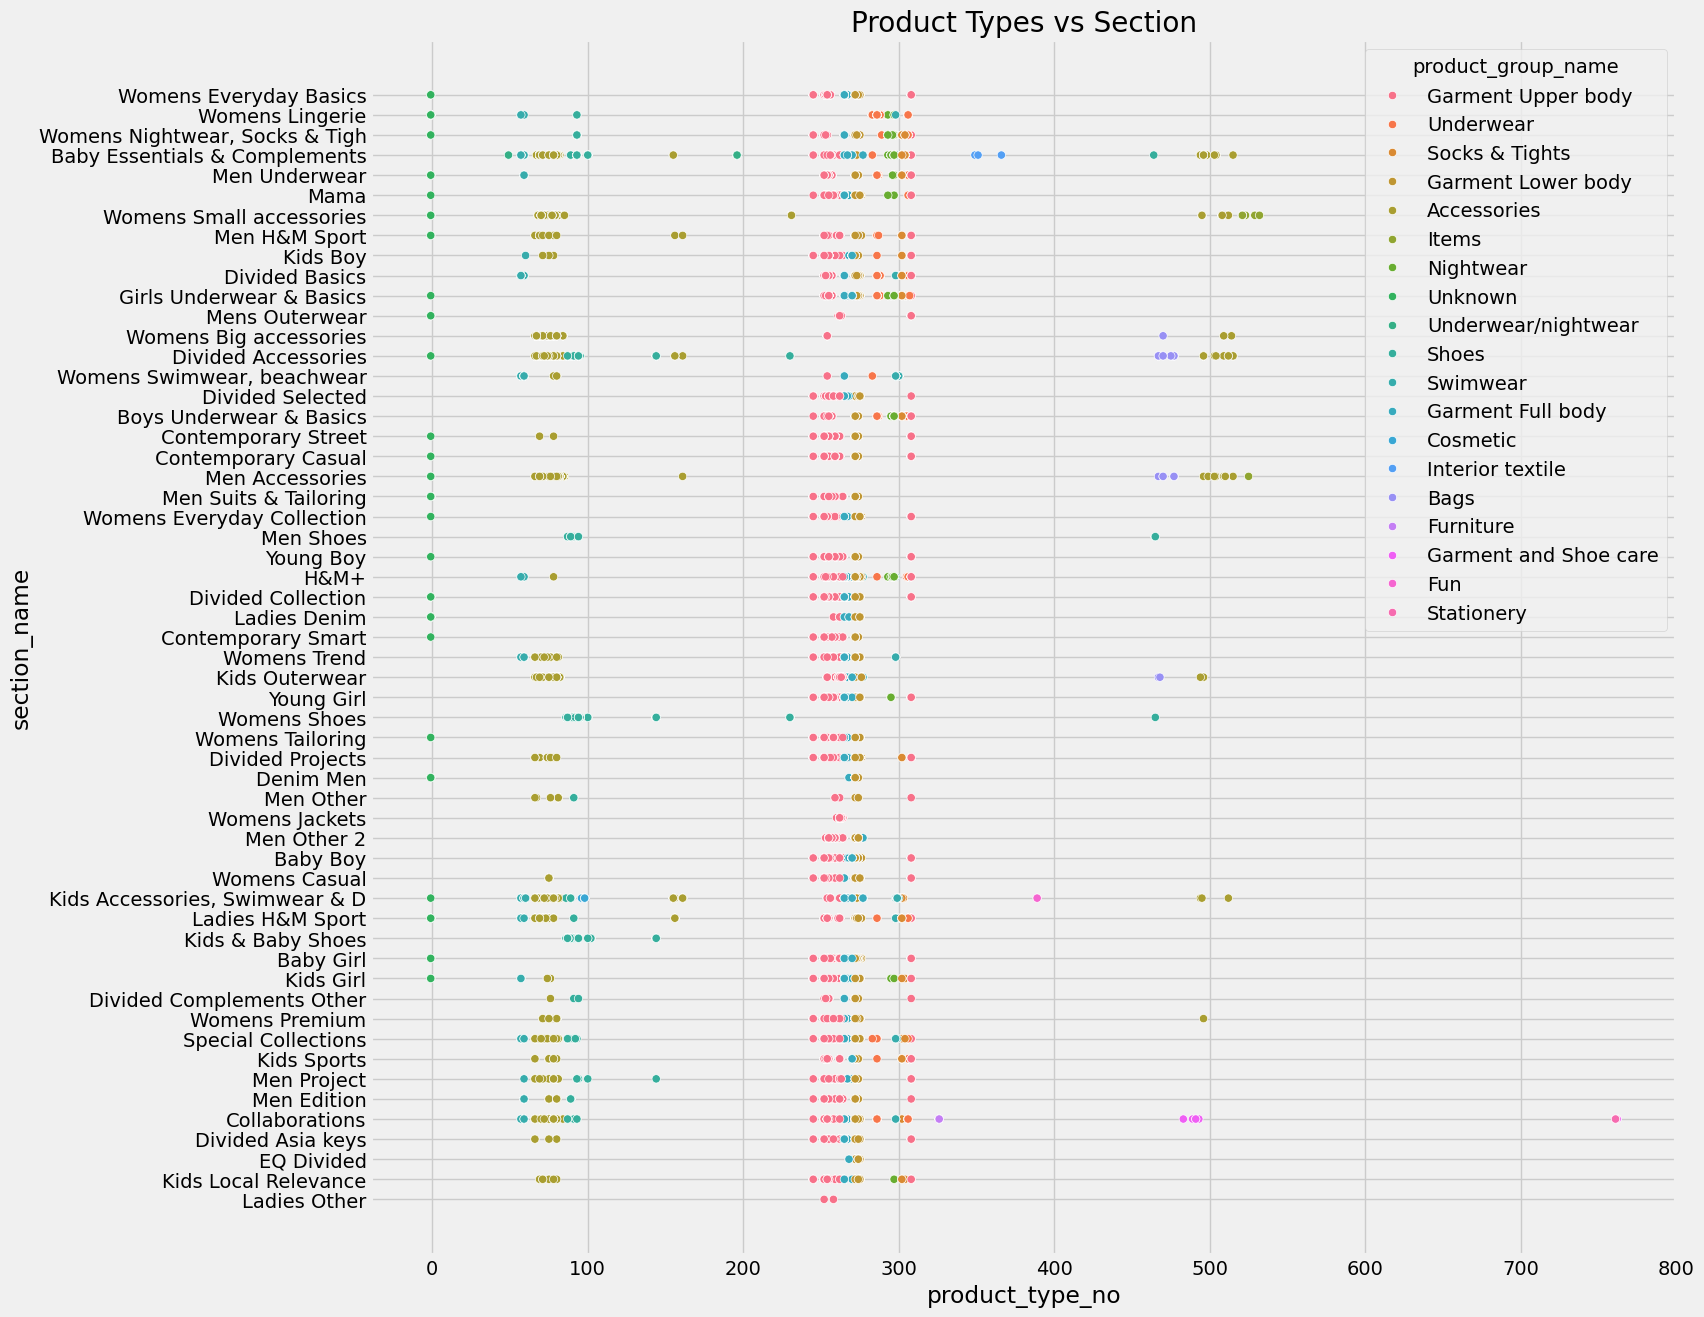

In [227]:
plt.figure(figsize=(15, 15))
custom_palette = sns.color_palette("RdYlBu", n_colors=len(articles_data_df["product_group_name"].unique()))

sns.scatterplot(x="product_type_no", y="section_name", hue="product_group_name", data=articles_data_df,)
plt.title("Product Types vs Section")
plt.show()

- Garment Upper body (pink dots) appears consistently across many section, clustering around the 200-300 range
- Most sections have a diverse mix of product types.
- Certain product groups appear more frequently in specific ranges:
	- Unknown product are cluster on the 0 range
	- Accessories tend to cluster in higher numbers (400-500)
	- Underwear and basics tend to be in lower numbers (0-200)
- Some products appear sporadically like "Furniture" and "Stationery"
- There's a clear organizational structure with similar product grouped together
- Some product type range show high specialization (few product types) while others are more diverse

In [272]:
# Calculate the correlation matrix for the dataset
correlation_matrix = articles_data_df.corr()

ValueError: could not convert string to float: 'Strap top'

In [273]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr, pointbiserialr


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta


def calculate_correlation(x, y):
    if x.dtype == "O" and y.dtype == "O":
        return cramers_v(x, y)
    elif x.dtype == "O" and y.dtype != "O":
        return correlation_ratio(x, y)
    elif x.dtype != "O" and y.dtype == "O":
        return correlation_ratio(y, x)
    else:
        return abs(pearsonr(x, y)[0])


def get_top_correlations(df, top_n=10):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    for i in range(len(df.columns)):
        for j in range(i, len(df.columns)):
            if i != j:
                corr = calculate_correlation(df.iloc[:, i], df.iloc[:, j])
                corr_matrix.iloc[i, j] = corr
                corr_matrix.iloc[j, i] = corr
            else:
                corr_matrix.iloc[i, j] = 1.0

    corr_pairs = []
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            corr_pairs.append((df.columns[i], df.columns[j], corr_matrix.iloc[i, j]))

    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    return corr_pairs[:top_n]


# Assuming your dataset is stored in a DataFrame called 'df'
# df = pd.read_csv('your_dataset.csv')

top_correlations = get_top_correlations(articles_data_df, top_n=10)

print("Top 10 most correlated variable pairs:")
for var1, var2, corr in top_correlations:
    print(f"{var1} - {var2}: {corr:.4f}")

MemoryError: Unable to allocate 14.8 GiB for an array with shape (45712, 43404) and data type float64